In [15]:
import pandas as pd

In [12]:
!rm "../../02. Madison Subset/Madison_Reviews_Exp.csv"

In [16]:
!ls "../../02. Madison Subset"

Madison_BusinessIds.csv		  Madison_Reviews.csv
MadisonRestaurants_CheckIn.csv	  Madison_UserIds_FromTipData.csv
MadisonRestaurants.csv		  MadisonUsersPartial.csv
MadisonRestaurants_Tip_Check.csv  MadisonUsersPartial.xlsx
MadisonRestaurants_Tip.csv


In [18]:
bdf = pd.read_csv("../../02. Madison Subset/MadisonRestaurants.csv")
rdf = pd.read_csv("../../02. Madison Subset/Madison_Reviews.csv")

In [19]:
df = bdf.merge(rdf, on="business_id")

In [20]:
df.head()

,Unnamed: 0_x,Unnamed: 0.1,business_id,name,address,city,state,postal_code,latitude,longitude,...,yelp_lifetime,Unnamed: 0_y,funny,useful,review_id,text,stars_y,date,user_id,cool
0,0,387,1BQzXcXFxR6MlVIYmG93kw,Zandru's,419 State St,Madison,WI,53703.0,43.074724,-89.392598,...,0.649315,46,0,1,M55Dbvn7123F1eTxe1b7-Q,So far not impressed. Here for a bachelorette ...,1.0,2017-05-13 23:30:46,3tco9dK9yCqsNk6olGqkqw,0
1,0,387,1BQzXcXFxR6MlVIYmG93kw,Zandru's,419 State St,Madison,WI,53703.0,43.074724,-89.392598,...,0.649315,47,0,0,cOeYP-7lY2Kb_0MgUYO4Kg,"Delicious, authentic Spanish food! Friendly s...",5.0,2017-08-17 00:05:49,2m-KLSt4yC3zTTBcyv46Tw,0
2,0,387,1BQzXcXFxR6MlVIYmG93kw,Zandru's,419 State St,Madison,WI,53703.0,43.074724,-89.392598,...,0.649315,48,3,7,YVs9P-DoILfXq08UKwOaxA,"With only one review in for the new Zandru's, ...",2.0,2017-04-20 14:40:55,8teQ4Zc9jpl_ffaPJUn6Ew,1
3,0,387,1BQzXcXFxR6MlVIYmG93kw,Zandru's,419 State St,Madison,WI,53703.0,43.074724,-89.392598,...,0.649315,49,0,0,RtIHX4mGwBPnJc8mC8wPtA,Great drinks! We just got the Spanish combinat...,5.0,2017-10-04 16:40:30,tm9jucB14wjhZZ00dNdsuQ,0
4,0,387,1BQzXcXFxR6MlVIYmG93kw,Zandru's,419 State St,Madison,WI,53703.0,43.074724,-89.392598,...,0.649315,50,0,1,c15Uor559lavT8N13NQLDw,I literally made this yelp account to warn eve...,1.0,2017-05-17 01:11:03,9Q45WYIP-ZHOVAZpYGFVpA,0


In [30]:
bdf[["yelp_lifetime"]].describe()

,yelp_lifetime
count,1175.000000
mean,6.308726
std,4.254870
min,0.041096
25%,2.575342
50%,5.682192
75%,9.872603
max,14.772603


In [21]:
bdf.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'business_id', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'Restaurant', 'Food', 'yelp_lifetime'],
      dtype='object')

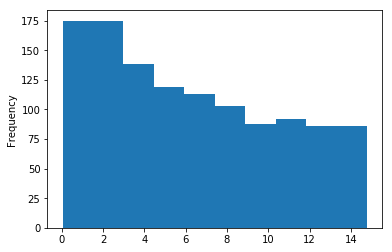

In [31]:
bdf["yelp_lifetime"].plot.hist()

is_open
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: yelp_lifetime, dtype: object

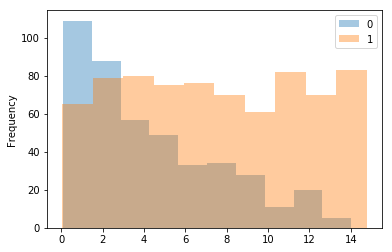

In [55]:
bdf.groupby('is_open')["yelp_lifetime"].plot.hist(alpha=0.4, legend=True)

In [40]:
bdf.groupby('postal_code').mean()["yelp_lifetime"].sort_values(ascending=False)

postal_code
53702.0    12.589041
53590.0    10.591781
53705.0     7.225548
53704.0     6.837605
53715.0     6.711757
53713.0     6.314240
53718.0     6.299178
53703.0     6.275954
53711.0     6.073909
53714.0     5.915479
53716.0     5.843764
53719.0     5.839308
53717.0     5.581719
53706.0     5.303787
53562.0     5.139726
53726.0     4.516895
53175.0     3.786301
53774.0     3.353425
53593.0     2.317808
53558.0     0.928767
Name: yelp_lifetime, dtype: float64

In [41]:
bdf[bdf["postal_code"] == 53558]

,Unnamed: 0,Unnamed: 0.1,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurant,Food,yelp_lifetime
1136,1136,202180,hLgjdl7CMmQ1T3oBcq3yNw,WeGo Waffles,NaN,Madison,WI,53558.0,43.007604,-89.294221,4.0,4,1,NaN,"Waffles, Food Trucks, Food, Restaurants, Ameri...",NaN,True,True,0.928767


In [44]:
print(bdf[bdf["yelp_lifetime"] < 1]["yelp_lifetime"].mean())
print(bdf[bdf["yelp_lifetime"] >= 1]["yelp_lifetime"].mean())

0.5407620582479565
6.958714715649647


In [45]:
print(bdf[bdf["yelp_lifetime"] < 1]["yelp_lifetime"].count())
print(bdf[bdf["yelp_lifetime"] >= 1]["yelp_lifetime"].count())

119
1056


In [50]:
print(bdf[bdf["yelp_lifetime"] < 1][bdf["is_open"] == 0]["yelp_lifetime"].count())
print(bdf[bdf["yelp_lifetime"] < 1][bdf["is_open"] == 1]["yelp_lifetime"].count())
print(bdf[bdf["yelp_lifetime"] >= 1][bdf["is_open"] == 0]["yelp_lifetime"].count())
print(bdf[bdf["yelp_lifetime"] >= 1][bdf["is_open"] == 1]["yelp_lifetime"].count())

71
48
363
693


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [53]:
print(bdf[bdf["yelp_lifetime"] < 1][bdf["is_open"] == 0]["yelp_lifetime"].count() / bdf[bdf["yelp_lifetime"] < 1]["yelp_lifetime"].count())
print(bdf[bdf["yelp_lifetime"] >= 1][bdf["is_open"] == 0]["yelp_lifetime"].count()/ bdf[bdf["yelp_lifetime"] >= 1]["yelp_lifetime"].count())

0.5966386554621849
0.34375


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
